In [1]:
import nltk
from nltk.corpus import stopwords
## https://likegeeks.com/es/tutorial-de-nlp-con-python-nltk/ 30/06/2020 1:45 pm#

In [46]:
import json 
#obtenemos el texto que queremos
with open(r"/home/rodrigo/data1/codigo/python/nltk_1/quote.json") as f:
    data = json.load(f)
print(data)
print(data.keys())
print(data['text'])

{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}
dict_keys(['text', 'author', 'tags'])
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


# Limpiar el texto de simbolos y mayusculas

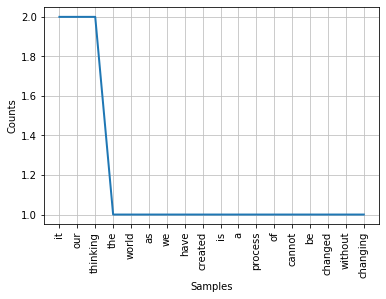

In [51]:
text = data['text']
clean_text = text.replace('”',"").replace('.','').replace('“','')
tokens_1 = [t for t in clean_text.split()]
tokens = [t.lower() for t in tokens_1]
clean_tokens = tokens[:]
freq=nltk.FreqDist(tokens)
freq.plot()

# Limpiar el texto de stopwords


A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine 
has been programmed to ignore, both when indexing entries for searching and when retrieving 
them as the result of a search query.

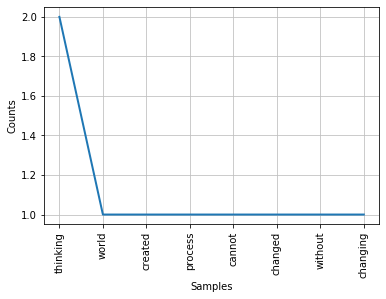

In [52]:
sr= stopwords.words('english')
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)
freq_clean =nltk.FreqDist(clean_tokens)
freq_clean.plot()

In [40]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

print(stemmer.stem('working'))

work


In [41]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('increases'))

increase


In [42]:
stemmed = [ lemmatizer.lemmatize(w) for w in tokens]
stemmed

['the',
 'world',
 'a',
 'we',
 'have',
 'created',
 'it',
 'is',
 'a',
 'process',
 'of',
 'our',
 'thinking',
 'it',
 'cannot',
 'be',
 'changed',
 'without',
 'changing',
 'our',
 'thinking']

In [49]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('playing', pos="v"))

print(lemmatizer.lemmatize('playing', pos="n"))

print(lemmatizer.lemmatize('playing', pos="a"))

print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


# Trabajar con arreglo de jsons


In [63]:

with open(r"/home/rodrigo/data1/codigo/python/nltk_1/quotes.json") as f:
    json_array = json.load(f)
    quotes_list =[]
    for item in json_array:
        quote_details = {"text":None, "author":None, "tags": None}
        quote_details['text'] = item['text']
        quote_details['author'] = item['author']
        quote_details['tags'] = item['tags']
        quotes_list.append(quote_details) 
quotes_list        

[{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author': 'Albert Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author': 'J.K. Rowling',
  'tags': ['abilities', 'choices']},
 {'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'author': 'Albert Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']},
 {'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'author': 'Jane Austen',
  'tags': ['aliteracy', 'books', 'classic', 'humor']},
 {'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'author': 'Marilyn Monroe',
  'tags': ['be-

In [ ]:
import json

input_file = open ('stores-small.json')
json_array = json.load(input_file)
store_list = []

for item in json_array:
    store_details = {"name":None, "city":None}
    store_details['name'] = item['name']
    store_details['city'] = item['city']
    store_list.append(store_details)

print(store_list)